### 오차(disturbance)와 잔차(residual)
- 오차(disturbance) : 어떠한 확률 모형의 선형모형(모집단의 확률변수 X)과 실제 값(y)의 차이

- 잔차(residual) : 위의 선형모형에서 뽑힌 확률변수들에서 뽑은 샘플로 만든 모형과 실제 값(y)과의 차이

- 잔차는 오차의 선형변환

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=0)
coef

array(42.38550485581797)

In [2]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0) # bias augmentation
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

##### 잔차의 정규성 검정

In [9]:
test = sms.omni_normtest(result.resid)
for xi in zip(['Chi-square','P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi-square  :  3.523
P-value     :  0.172


In [10]:
test = sms.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


독립변수가 변할때 잔차의 분포가 어떻게 바뀌는지 살펴보기 위한 검정이다
독립변수가 달라져도 크게 바뀌지 않는다고 볼 수있다.(H0:상관관계=0)

잔차의 기댓값은 독립변수와 상관없이 0이다.

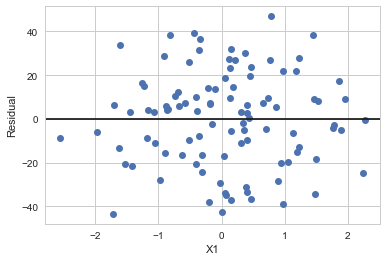

In [13]:
# 바로 위의 내용 시각화
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

##### 구간별로 자세하게봐도 둘다 기댓값은 0에 가깝고 분산도 비슷하다고 볼 수 있다.

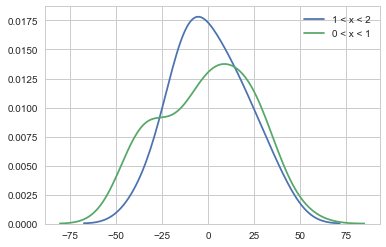

In [12]:
sns.kdeplot(result.resid[((1 < X0) & (X0 < 2)).flatten()], label="1 < x < 2")
sns.kdeplot(result.resid[((0 < X0) & (X0 < 1)).flatten()], label="0 < x < 1")
plt.legend()
plt.show()

#### Single coefficient t-test
- 정규화된 모수오차를 검정통계량으로 사용하여, w가 0인지 아닌지 검정(H0: w=0)

##### 아래 보고서를 보면 실제 w0값이 0일 가능성이 높다. 즉, 상수항을 가지지 않는다 볼 수 있다.
- `std err` : 모형계수의 표준오차
- `t` : coef를 std err로 나눈 검정통계량

In [14]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           2.21e-36
Time:                        19:43:53   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

##### H0 : w = 0이 아닌 w = 40으로 설정하여 t -test를 할 수 있다.

In [15]:
print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


x1이 40일 가능성이 높다고 볼 수 있다.

##### Loss of Fit 검정(F-검정)
- 개별 계수가 아닌 전체 회귀계수가 의미가 있는지 확인
- H0: w0=w1=.......=wk-1=0
- 유의 확률이 작으면 작을 수록 더 강력하게 기각된다고 보고, 더 의미있는 모형이라 말할 수 있다.